In [1]:
import matplotlib.pyplot as plt
import json

In [2]:
def join_dictionaries(*args):
    history, *remaining = args
    for h in remaining:
        for key, value in h.items():
            try:
                history[key] += value
            except: 
                pass
    return history

In [3]:
def load_multiple(*args):
    histories = []
    for i in args:
        with open(i) as f: 
            histories.append(json.load(f))
    return join_dictionaries(*histories)

In [4]:
def plot_graphs(history, smooth = False):
    
    def smooth_curve(points, factor=0.8):
        smoothed_points = []
        for point in points:
            if smoothed_points:
                previous = smoothed_points[-1]
                smoothed_points.append(previous * factor + point * (1 - factor))
            else:
                smoothed_points.append(point)
        return smoothed_points

    for key, value in history.items():
        if key.startswith('val'): continue

        training = smooth_curve(value) if smooth else value
        validation = smooth_curve(history[f'val_{key}']) if smooth else history[f'val_{key}'] 
        epochs = range(1, len(training) + 1)
        try:
            plt.figure()
            plt.plot(epochs, training, 'r', label=f'Training {key}')
            plt.plot(epochs, validation, 'b', label=f'Validation {key}')
            plt.title(f'Training and validation {key}')
            plt.legend()
        except: 
            pass
   
    plt.show()

    for key, value in history.items():
        if not key.startswith('val'): continue
        print(f'Min/Max Validation {key}', min(value), max(value))

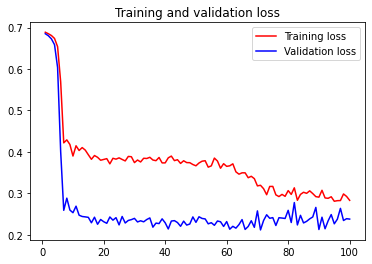

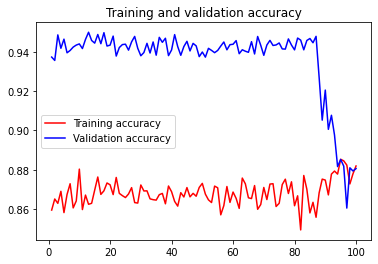

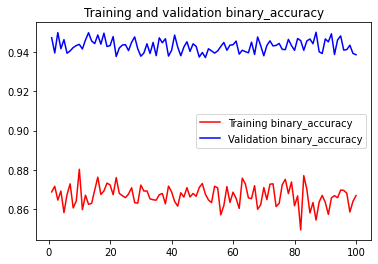

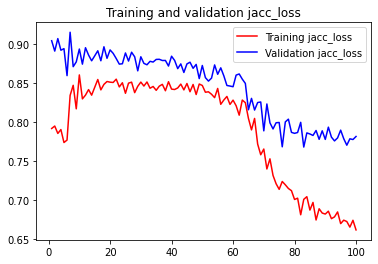

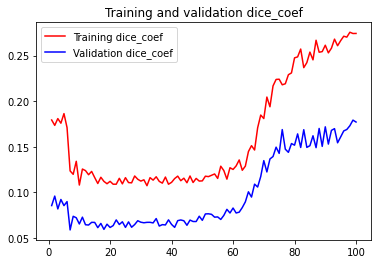

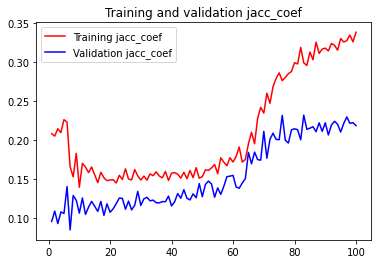

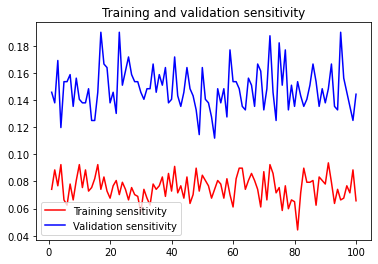

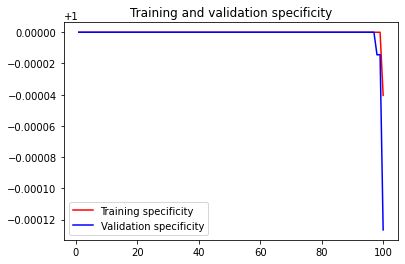

Min/Max Validation val_loss 0.21188201010227203 0.6851165294647217
Min/Max Validation val_accuracy 0.8604782223701477 0.949915885925293
Min/Max Validation val_binary_accuracy 0.9372614622116089 0.9501711130142212
Min/Max Validation val_jacc_loss 0.767997682094574 0.9155939221382141
Min/Max Validation val_dice_coef 0.05854114890098572 0.1791667491197586
Min/Max Validation val_jacc_coef 0.08440601825714111 0.23200233280658722
Min/Max Validation val_sensitivity 0.1119791641831398 0.1901041716337204
Min/Max Validation val_specificity 0.9998733997344971 1.0


In [5]:
history = load_multiple('simple rgb.json')
plot_graphs(history)